<a href="https://colab.research.google.com/github/KKawaguchi1219/seminar_animation/blob/main/pendulum_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib import cm

In [ ]:
def simple_pendulum(t, x):
    theta, omega = x
    return [omega, -np.sin(theta)]

In [ ]:
init_params = [5*np.pi/6, 0]
t_span = [0, 20]
dt=0.1
t_s= np.arange(t_span[0], t_span[1], dt)

In [ ]:
slv = solve_ivp(simple_pendulum, t_span, init_params, t_eval=t_s)

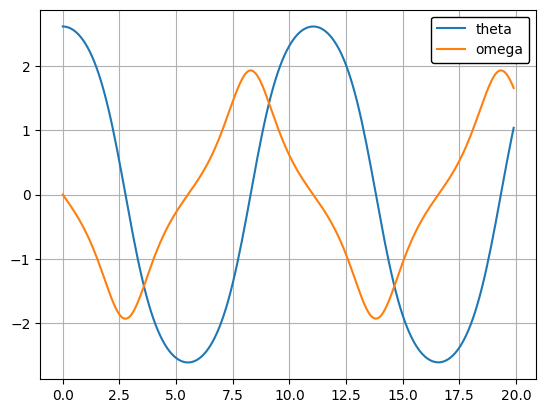

In [ ]:
plt.plot(t_s, slv.y[0], label='theta')
plt.plot(t_s, slv.y[1], label='omega')
plt.grid()
plt.legend(edgecolor='black', framealpha=1)
plt.show()

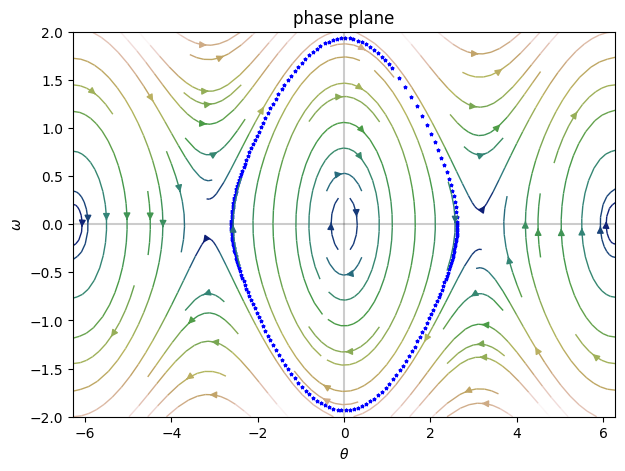

In [ ]:
theta_values = np.linspace(-2*np.pi, 2*np.pi, 100)
omega_values = np.linspace(-2, 2, 100)

theta, omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = omega
domega_dt = -np.sin(theta)
magnitude = np.sqrt(dtheta_dt**2 + domega_dt**2)

fig, ax = plt.subplots(figsize=(7, 5))
ax.axhline(y=0, color='k', alpha=0.2)
ax.axvline(x=0, color='k', alpha=0.2)
ax.streamplot(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, color=magnitude, cmap=cm.gist_earth, linewidth=1)

#quiver=ax.quiver(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, magnitude, cmap=cm.gist_earth, width=0.004, alpha=1)
#cbar = fig.colorbar(quiver, ax=ax)
ax.scatter(slv.y[0], slv.y[1], marker='*', c='b', s=5, label='orbit_1')

ax.set_ylabel(r'$\omega$', fontsize=10)
ax.set_xlabel(r'$\theta$', fontsize=10)
ax.set_title("phase plane")
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-2, 2)
#ax.legend(edgecolor='black', framealpha=1, loc='upper left')
plt.show()

<ipython-input-60-0e52ff5deef3>:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point.set_data(slv.y[0][i], slv.y[1][i])
<ipython-input-60-0e52ff5deef3>:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point.set_data(slv.y[0][i], slv.y[1][i])


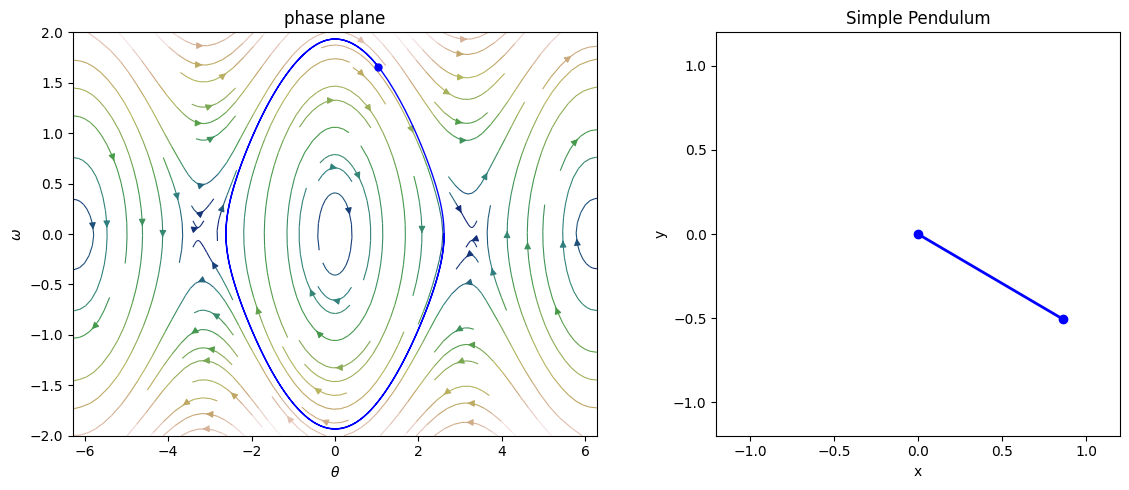

In [ ]:
l = 1
x = l * np.sin(slv.y[0])
y = -l * np.cos(slv.y[0])
theta_data = []
omega_data = []

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

#相平面アニメーション
theta_values = np.linspace(-2*np.pi, 2*np.pi, 20)
omega_values = np.linspace(-2, 2, 20)

theta, omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = omega
domega_dt = -np.sin(theta)
magnitude = np.sqrt(dtheta_dt**2 + domega_dt**2)

ax1.axhline(y=0, color='k', alpha=0.2)
ax1.axvline(x=0, color='k', alpha=0.2)
ax1.streamplot(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, color=magnitude, cmap=cm.gist_earth, linewidth=0.8)

phase_point, = ax1.plot([], [], 'bo', markersize=5)
phase_line, = ax1.plot([], [], 'b-', lw=1)
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"$\omega$")
ax1.set_title("phase plane")

#振り子アニメーション
ax2.set_title('Simple Pendulum')
ax2.set_xlim(-l-l/5,l+l/5)
ax2.set_ylim(-l-l/5,l+l/5)
ax2.set_aspect('equal')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
line, = ax2.plot([], [], 'o-', c='blue', linewidth=2) # このlineに次々と座標を代入して描画


def animation(i):
    # 振り子データ更新
    thisx = [0, x[i]]
    thisy = [0, y[i]]
    line.set_data(thisx, thisy)

    # 相平面データ更新
    theta_data.append(slv.y[0][i])
    omega_data.append(slv.y[1][i])
    phase_point.set_data(slv.y[0][i], slv.y[1][i])
    phase_line.set_data(theta_data, omega_data)

    return line, phase_point, phase_line

ani = FuncAnimation(fig, animation, frames=np.arange(0, len(t_s)), interval=dt*1000, blit=True)

filename = "pendulum_animation_5pi6_0.mp4"
writer = FFMpegWriter(fps=30, metadata={"artist": "Matplotlib"}, bitrate=1800)
ani.save(filename, writer=writer)

plt.tight_layout()
plt.show()

#ani.save('pendulum.gif', writer='pillow', fps=15)

In [ ]:
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/pendulum_animation_5pi6_0.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")


\

---

**抵抗あり**

In [ ]:
def damped_simple_pendulum(t, x, r):
    theta, omega = x
    return [omega, -r*omega-np.sin(theta)]

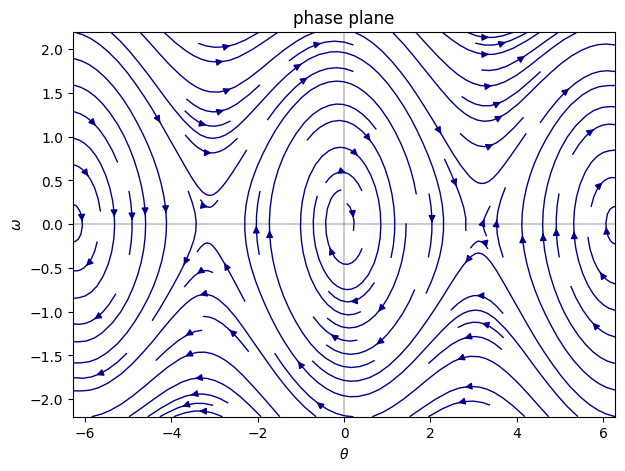

In [ ]:
theta_values = np.linspace(-2*np.pi, 2*np.pi, 20)
omega_values = np.linspace(-2.2, 2.2, 20)

theta, omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = omega
domega_dt = -r*omega-np.sin(theta)
magnitude = np.sqrt(dtheta_dt**2 + domega_dt**2)

fig, ax = plt.subplots(figsize=(7, 5))
ax.axhline(y=0, color='k', alpha=0.2)
ax.axvline(x=0, color='k', alpha=0.2)

ax.streamplot(theta, omega, dtheta_dt, domega_dt, color='darkblue', linewidth=1)
#quiver=ax.quiver(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, magnitude, cmap=cm.gist_earth, width=0.006, alpha=1)
#cbar = fig.colorbar(quiver, ax=ax)

ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\omega$")
ax.set_title("phase plane")
plt.show()

In [ ]:
init_params = [0, 2.1]
t_span = [0, 100]
dt=0.1
t_s= np.arange(t_span[0], t_span[1], dt)
r = 0.1

In [ ]:
slv_damped = solve_ivp(damped_simple_pendulum, t_span, init_params, t_eval=t_s, args=(r,))

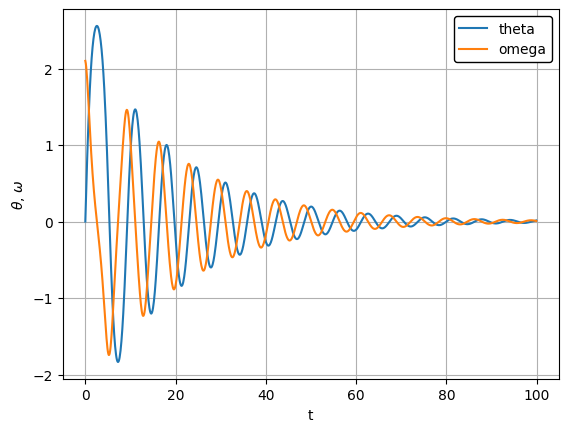

In [ ]:
plt.plot(t_s, slv_damped.y[0], label='theta')
plt.plot(t_s, slv_damped.y[1], label='omega')
plt.xlabel('t')
plt.ylabel(r'$\theta$, $\omega$')
plt.grid()
plt.legend(edgecolor='black', framealpha=1)
plt.show()

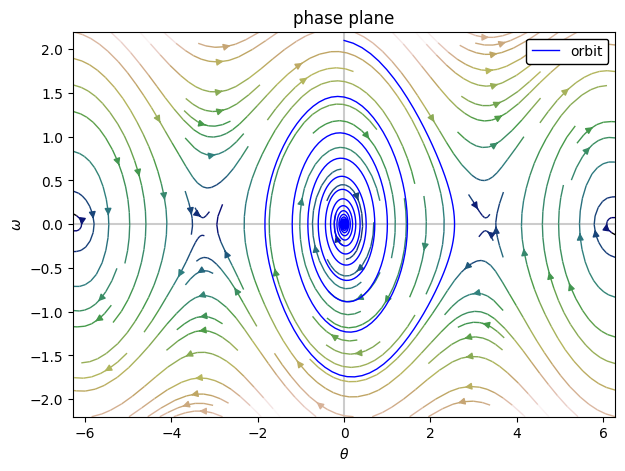

In [ ]:
theta_values = np.linspace(-2*np.pi, 2*np.pi, 20)
omega_values = np.linspace(-2.2, 2.2, 20)

theta, omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = omega
domega_dt = -r*omega-np.sin(theta)
magnitude = np.sqrt(dtheta_dt**2 + domega_dt**2)

fig, ax = plt.subplots(figsize=(7, 5))
ax.axhline(y=0, color='k', alpha=0.2)
ax.axvline(x=0, color='k', alpha=0.2)

#quiver=ax.quiver(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, magnitude, cmap=cm.gist_earth, width=0.004, alpha=1)
#cbar = fig.colorbar(quiver, ax=ax)
ax.streamplot(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, color=magnitude, cmap=cm.gist_earth, linewidth=1)
ax.plot(slv_damped.y[0], slv_damped.y[1], c='blue', linewidth=1, label='orbit')

ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\omega$")
ax.set_title("phase plane")
ax.legend(edgecolor='black', framealpha=1)
plt.show()

<ipython-input-52-6c32c61f1ad4>:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point.set_data(slv_damped.y[0][i], slv_damped.y[1][i])
<ipython-input-52-6c32c61f1ad4>:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point.set_data(slv_damped.y[0][i], slv_damped.y[1][i])


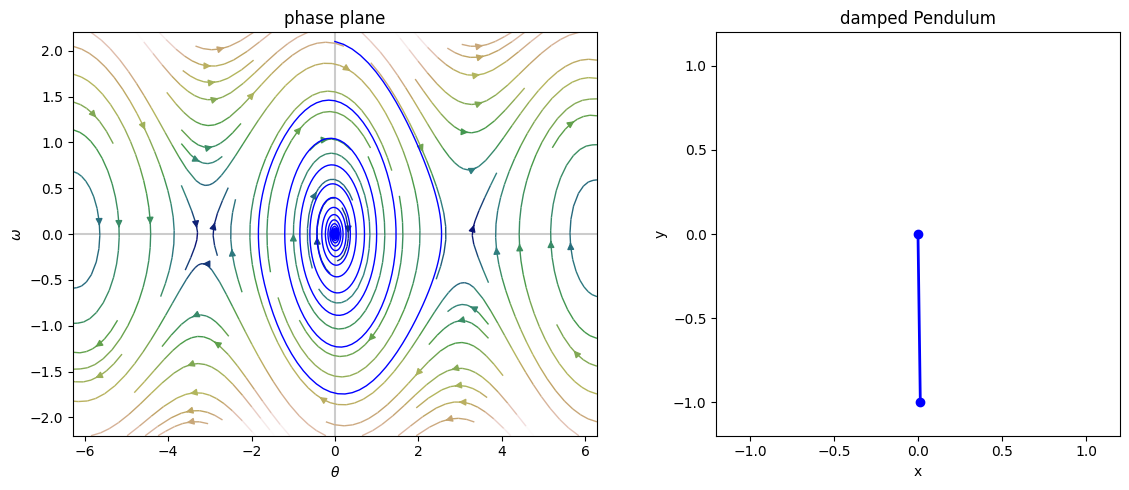

In [ ]:
l = 1
x = l * np.sin(slv_damped.y[0])
y = -l * np.cos(slv_damped.y[0])
theta_data = []
omega_data = []

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

#相平面アニメーション
theta_values = np.linspace(-2*np.pi, 2*np.pi, 100)
omega_values = np.linspace(-2.2, 2.2, 100)

theta, omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = omega
domega_dt = -r*omega-np.sin(theta)
magnitude = np.sqrt(dtheta_dt**2 + domega_dt**2)

ax1.axhline(y=0, color='k', alpha=0.2)
ax1.axvline(x=0, color='k', alpha=0.2)
ax1.streamplot(theta, omega, dtheta_dt/magnitude, domega_dt/magnitude, color=magnitude, cmap=cm.gist_earth, linewidth=1)
phase_point, = ax1.plot([], [], 'bo', markersize=5)
phase_line, = ax1.plot([], [], 'b-', lw=1)
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"$\omega$")
ax1.set_title("phase plane")

#振り子アニメーション
ax2.set_title('damped Pendulum')
ax2.set_xlim(-l-l/5,l+l/5)
ax2.set_ylim(-l-l/5,l+l/5)
ax2.set_aspect('equal')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
line, = ax2.plot([], [], 'o-', c='blue', linewidth=2) # このlineに次々と座標を代入して描画

plt.tight_layout()

def animation(i):
    # 振り子データ更新
    thisx = [0, x[i]]
    thisy = [0, y[i]]
    line.set_data(thisx, thisy)

    # 相平面データ更新
    theta_data.append(slv_damped.y[0][i])
    omega_data.append(slv_damped.y[1][i])
    phase_point.set_data(slv_damped.y[0][i], slv_damped.y[1][i])
    phase_line.set_data(theta_data, omega_data)

    return line, phase_point, phase_line

ani = FuncAnimation(fig, animation, frames=np.arange(0, len(t_s)), interval=dt*1000, blit=True)

filename = "damped_pendulum_animation.mp4"
writer = FFMpegWriter(fps=30, metadata={"artist": "Matplotlib"}, bitrate=1800)
ani.save(filename, writer=writer)

plt.show()

#ani.save('pendulum.gif', writer='pillow', fps=15)

In [ ]:
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/damped_pendulum_animation.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

---
\
**Coupled oscillator**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [ ]:
def coupled_oscillator(t, x, omega_1, omega_2, K_1, K_2):
    theta_1, theta_2= x
    dtheta_1 = omega_1 + K_1 * np.sin(theta_2 - theta_1)
    dtheta_2 = omega_2 + K_2 * np.sin(theta_1 - theta_2)
    return [dtheta_1, dtheta_2]

In [ ]:
t_span = [0, 10]
dt=0.01
t_s= np.arange(t_span[0], t_span[1], dt)

init_params = np.random.uniform(0, 2*np.pi, 2)
omega1, omega2 = np.random.normal(loc=1, scale=1, size=2)
K1 = 4
K2 = 4

In [ ]:
slv_cp = solve_ivp(coupled_oscillator, t_span, init_params, method='DOP853', t_eval=t_s, args=(omega1, omega2, K1, K2))

<ipython-input-114-e15f17dd9a9a>:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line1.set_data(x[0], y[0])
<ipython-input-114-e15f17dd9a9a>:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line2.set_data(x[1], y[1])
<ipython-input-114-e15f17dd9a9a>:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line3.set_data(np.cos(theta_1-theta_2), np.sin(theta_1-theta_2))


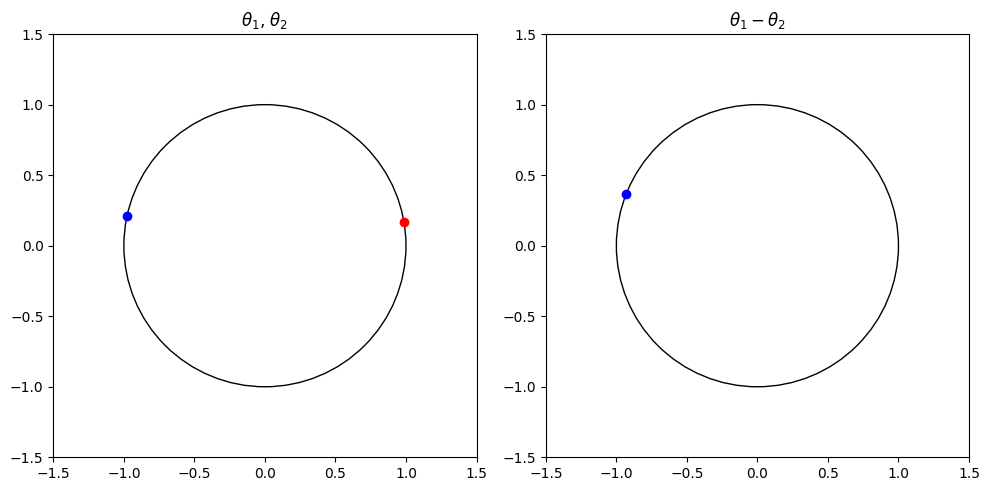

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

for ax in (ax1, ax2):
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

circle = plt.Circle((0, 0), 1, edgecolor='k', facecolor='none')
ax1.add_artist(circle)
ax1.set_title(r'$\theta_1$, $\theta_2$')
line1, = ax1.plot([], [], 'bo', lw=1)
line2, = ax1.plot([], [], 'ro', lw=1)

ax2.set_title(r'$\theta_1-\theta_2$')
circle = plt.Circle((0, 0), 1, edgecolor='k', facecolor='none')
ax2.add_artist(circle)
line3, = ax2.plot([], [], 'bo', lw=1)

plt.tight_layout()


def update(frame):
    theta_1 = slv_cp.y[0][frame]
    theta_2 = slv_cp.y[1][frame]
    x = [np.cos(theta_1), np.cos(theta_2)]
    y = [np.sin(theta_1), np.sin(theta_2)]

    line1.set_data(x[0], y[0])
    line2.set_data(x[1], y[1])

    line3.set_data(np.cos(theta_1-theta_2), np.sin(theta_1-theta_2))

    return line1, line2, line3

ani = animation.FuncAnimation(fig, update, frames=len(t_s), blit=True)


In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
ani.save('coupled_oscillators.mp4', writer=writer)

plt.show()

<ipython-input-114-e15f17dd9a9a>:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line1.set_data(x[0], y[0])
<ipython-input-114-e15f17dd9a9a>:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line2.set_data(x[1], y[1])
<ipython-input-114-e15f17dd9a9a>:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line3.set_data(np.cos(theta_1-theta_2), np.sin(theta_1-theta_2))


In [ ]:
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/coupled_oscillators.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="80%" height="80%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

---

**蔵本モデル**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [ ]:
def kuramoto(t, theta, omega, K, N):
    dtheta = np.zeros_like(theta)
    for i in range(N):
        dtheta[i] = omega[i] + (K / N) * np.sum(np.sin(theta - theta[i]))
    return dtheta

In [ ]:
# 秩序変数を計算
def order_parameter(theta):
    z = np.exp(1j * theta)  # 単位円上の複素数
    z_mean = np.mean(z)     # 振動子全体の重心（複素平面）
    return z_mean

In [ ]:
N = 50  # 振動子の数
K = 2.6  # 結合強度
omega = np.random.normal(1, 1, N)  # 自然周波数（ランダム設定）
theta0 = np.random.uniform(0, 2*np.pi, N)  # 初期位相（ランダム設定）
t_span = (0, 20)  # 時間範囲
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # 出力時間


In [ ]:
solution = solve_ivp(
    kuramoto,
    t_span,
    theta0,
    args=(omega, K, N),
    t_eval=t_eval,
    method='RK45'
)

In [ ]:
t = solution.t
theta = solution.y

<ipython-input-215-f8bb51a7acbb>:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  order_point.set_data(np.real(z_mean), np.imag(z_mean))  # 秩序変数の重心


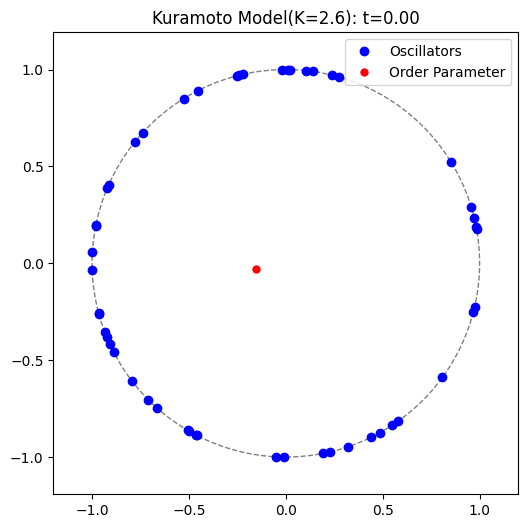

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal', adjustable='datalim')
ax.set_title("Kuramoto Model with Order Parameter")

# 単位円
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

# 振動子のプロット
points, = ax.plot([], [], 'bo', label='Oscillators')
order_point, = ax.plot([], [], 'ro', label='Order Parameter', markersize=5)  # 秩序変数
ax.legend(loc='upper right')

# フレーム更新関数
def update(frame):
    x = np.cos(theta[:, frame])  # 振動子のx座標
    y = np.sin(theta[:, frame])  # 振動子のy座標
    points.set_data(x, y)

    # 秩序変数の計算
    z_mean = order_parameter(theta[:, frame])
    order_point.set_data(np.real(z_mean), np.imag(z_mean))  # 秩序変数の重心
    ax.set_title(f"Kuramoto Model({K=}): t={t[frame]:.2f}")
    return points, order_point

# アニメーション作成
ani = FuncAnimation(
    fig,
    update,
    frames=len(t),
    interval=20,  # アニメーションの速度（ms）
    blit=True
)

plt.show()


In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
ani.save('KuramotoModel_K.mp4', writer=writer)

plt.show()

<ipython-input-215-f8bb51a7acbb>:24: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  order_point.set_data(np.real(z_mean), np.imag(z_mean))  # 秩序変数の重心


In [ ]:
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/KuramotoModel_K.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")